___
# Курс Карпова "Введение в Data science и машинное обучение"
___

Разница между Data analyst, Data engeneer, ML engeneer и остальными

Domain - знания в области и общение с заказчиком, Math - математика, Dev - программная часть

![title](Pic_1.png)

1) В решении задач очень важно уметь ПЕРЕФОРМУЛИРОВАТЬ задачу на язык ML;

2) Далее необходимо подготовить данные

3) Применение ML 

4) Валидация. Валидация - проверка того, что можеть может выдавать предсказание выше случайного

Фича - (независимое) свойство объекта для отнесения к одному или другому классу

Целевая переменная (зависимое свойство) - это сам класс

Модель - это такая штука, которая получает информацию об объекте и относит его к тому или иному классу

Линейная регрессия - это подбор коэффициентов прямой, чтобы среднеквадратичная ошибка была минимальная

![title](Pic_2.png)
![title](Pic_3.png)

Обучить модель машинного обучения ЗНАЧИТ на основании конечного набора примеров добиться того, чтобы на других примерах мочь делать правильные предсказания

____

# Компетенции для датасейнтиста:

1) Самостоятельность

2) Ответственность

3) Вдумчивость -- отвечать на вопросы почему так и какие для этого преопосылки с описанием, а не сухие цифры 



Тезисы из видео:

1. При построении карьеры в Data Science важно иметь готовые проекты, чтобы на собеседовании направить диалог по удобному для себя руслу, да и просто продемонстрировать свои конкурентные преимущества

2. Датасеты для анализа можно брать с kaggle, открытых источников, или просто собирать при помощи парсеров. причём последний вариант даёт плюс к компетенциям, поскольку вы покажете умение кодить и получать данные для своих моделей

3. Важны soft-skills

4. Важно и нужно уметь отвечать на вопросы не "Сколько?", а "Почему?". Поскольку получение цифр не даёт информации, а анализ этих цифр, анализ причин почему цифры именно такие, и как они сформировались - позволяет представить некоторую картину в процессах.

5. Работайте с API и хакатонами. Поднатаскайтесь в плане работы с проектами, пусть даже через API проекта. Пишите свои проекты и ссылайтесь на них в резюме.

In [14]:
import pandas as pd
import numpy as np

In [18]:
students_performanse = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [20]:
students_performanse.head() # Вывод первых 5 строчек

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
students_performanse.tail() # Вывод последних 5 строчек

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [22]:
students_performanse.describe() # вывод основных параметров данных

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [23]:
students_performanse.dtypes # вывод типов данных столбцов

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [24]:
students_performanse.shape # вывод размерности DataFrame

(1000, 8)

Методы можно по-хитрому объединять, например, для группировки

In [29]:
students_performanse.groupby('gender').aggregate({'writing score': 'mean'})
# Далее по сути выводится средний балл по каждому полу

,writing score
gender,
female,72.467181
male,63.311203


In [31]:
students_performanse.size # произведение колонок на строки

8000

___
### Основные операции с DataFrame
___

In [32]:
students_performanse.head() # Вывод первых 5 строчек

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Вывод элементов DataFrame по индексам осуществляется через метод .iloc так:

In [41]:
students_performanse.iloc[0:5, 0:3] # Метод iloc (integer location) - типа позиции
# По сути, это обращение к элементам dataframe по индексам

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
1,female,group C,some college
2,female,group B,master's degree
3,male,group A,associate's degree
4,male,group C,some college


In [36]:
students_performanse[0:5, 0:3] # А так не рабоатет

TypeError: '(slice(0, 5, None), slice(0, 3, None))' is an invalid key

In [40]:
students_performanse.iloc[[0, 3, 9, -1], [-1, -2, -3]] # Метод iloc (integer location) - типа позиции

,writing score,reading score,math score
0,74,72,72
3,44,57,47
9,50,60,38
999,86,86,77


Вывод элементов DataFrame по названиям осуществляется через метод .loc так:

(но сначала немного подготовки)

Выделим определенные строки (индексы в смысле DataFrame-ов):

In [74]:
students_performanse_with_names = students_performanse.iloc[[0, 3, 4, 7, 8]] 

In [75]:
students_performanse_with_names.index = ['Cersei', 'Tywin', 'Gregor', 'Joffrey', 'Ilyn Payne']

In [76]:
students_performanse_with_names

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
Cersei,female,group B,bachelor's degree,standard,none,72,72,74
Tywin,male,group A,associate's degree,free/reduced,none,47,57,44
Gregor,male,group C,some college,standard,none,76,78,75
Joffrey,male,group B,some college,free/reduced,none,40,43,39
Ilyn Payne,male,group D,high school,free/reduced,completed,64,64,67


In [49]:
students_performanse_with_names.loc[['Cersei', 'Joffrey'], ['gender', 'writing score']]

,gender,writing score
Cersei,female,74
Joffrey,male,39


___
Серии (Series) в pandas

Серия - это такой список с именами (labels) элементов
___

In [50]:
students_performanse_with_names.iloc[:, 0]

Cersei        female
Tywin           male
Gregor          male
Joffrey         male
Ilyn Payne      male
Name: gender, dtype: object

In [51]:
type(students_performanse_with_names.iloc[:, 0])

pandas.core.series.Series

In [54]:
pd.Series([1, 2, 3], index=['Cersei', 'Tywin', 'Gregor'])

Cersei    1
Tywin     2
Gregor    3
dtype: int64

In [53]:
type(pd.Series([1,2,3]))

pandas.core.series.Series

___
А DataFrame сам по себе представляет из себя всего лишь Серии (столбцы) с названиями (названия стоблцов)
___

In [56]:
my_series_1 = pd.Series([1, 2, 3], index=['Cersei', 'Tywin', 'Gregor'])
my_series_2 = pd.Series([4, 5, 6], index=['Cersei', 'Tywin', 'Gregor'])

In [57]:
pd.DataFrame({'col_name_1':my_series_1, 'col_name_2':my_series_2})

,col_name_1,col_name_2
Cersei,1,4
Tywin,2,5
Gregor,3,6


Таким образом, можно к датафрейму обращаться по именам серий (и, как ни странно, получать серии):

Причем можно при обращении получить как серию, так и датафрейм из одного столбца:

In [59]:
students_performanse_with_names['gender'] 

Cersei        female
Tywin           male
Gregor          male
Joffrey         male
Ilyn Payne      male
Name: gender, dtype: object

In [60]:
students_performanse_with_names[['gender']]

,gender
Cersei,female
Tywin,male
Gregor,male
Joffrey,male
Ilyn Payne,male


In [61]:
students_performanse.iloc[0:7]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [62]:
students_performanse.iloc[:7]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [63]:
students_performanse.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [65]:
students_performanse.loc[:7]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39


In [66]:
students_performanse.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

___
Разница между loc и iloc:

The main distinction between the two methods is:

loc gets rows (and/or columns) with particular labels.

iloc gets rows (and/or columns) at integer locations.

To demonstrate, consider a series s of characters with a non-monotonic integer index:

___
s = pd.Series(list("abcdef"), index=[49, 48, 47, 0, 1, 2]) 
49    a
48    b
47    c
0     d
1     e
2     f

___
s.loc[0]    # value at index label 0
'd'

___
s.iloc[0]   # value at index location 0
'a'

___
s.loc[0:1]  # rows at index labels between 0 and 1 (inclusive)
0    d
1    e

___
s.iloc[0:1] # rows at index location between 0 and 1 (exclusive)
49    a
___

In [67]:
students_performanse.shape

(1000, 8)

In [68]:
students_performanse.size

8000

In [72]:
students_performanse.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [73]:
students_performanse.index

RangeIndex(start=0, stop=1000, step=1)

In [75]:
students_performanse.dtypes.value_counts()

object    5
int64     3
dtype: int64

___
Какая-то задача
____

In [76]:
titan_ds = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [77]:
titan_ds.shape

(891, 12)

In [78]:
titan_ds.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [80]:
titan_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


___
# Фильтрация Dataframe-ов
___

In [1]:
import pandas as pd
import numpy as np

In [2]:
students_performanse = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [3]:
students_performanse.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
students_performanse.gender == 'female'

0       True
1       True
2       True
3      False
4      False
       ...  
995     True
996    False
997     True
998     True
999     True
Name: gender, Length: 1000, dtype: bool

___
Отфильтровать записи (строки) можно следующим образом:

По сути мы просим вывести те записи, для которых значение gender True или False
___

In [8]:
students_performanse.loc[students_performanse.gender == 'female', ['gender', 'writing score']]
# По сути мы просим вывести те строки в которых gender == female и при этом из таких записей
# вывести только столбцы gender и writing score

,gender,writing score
0,female,74
1,female,88
2,female,93
5,female,78
6,female,92
...,...,...
993,female,74
995,female,95
997,female,65
998,female,77


Выведем только те записи, у которых значение "writing score" больше среднего

In [10]:
mean_writing_score = students_performanse['writing score'].mean()

In [11]:
students_performanse.loc[students_performanse['writing score'] > mean_writing_score]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


___
В pandas нельзя использовать and к сериям. Это значит, что если мы хотим сделать совместный фильтр по нескольким условиям, то применять and или or нельзя. Необходимо применять перегруженные операторы & и |. Причем оччень важно понимать, что такие операторы имеют бОльший приоритет, чем другие логические (но не арифметические операции). 

Пример неправильного использования:

In [12]:
students_performanse['writing score'] > mean_writing_score and students_performanse.gender == 'female'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Данная ошибка говорит, что нельзя применять логический оператор and к серии (а сравнение идет именно серий)

Пример правильного использования:

In [15]:
query = (students_performanse['writing score'] > mean_writing_score) & (students_performanse.gender == 'female')

In [16]:
students_performanse.loc[query]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


___
Вопрос: у какой доли студентов в графе lunch указано "free/reduced"?

Решение ниже:

In [17]:
query = (students_performanse.lunch == 'free/reduced')

In [22]:
students_performanse.loc[query].shape[0]/students_performanse.shape[0]

0.355

___
Вопрос: Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?



In [30]:
students_performanse.loc[students_performanse.lunch == 'free/reduced'].mean()

math score       58.921127
reading score    64.653521
writing score    63.022535
dtype: float64

In [31]:
students_performanse.loc[students_performanse.lunch != 'free/reduced'].mean()

math score       70.034109
reading score    71.654264
writing score    70.823256
dtype: float64

In [34]:
students_performanse.loc[students_performanse.lunch == 'free/reduced'].var()

math score       229.824270
reading score    221.871139
writing score    238.202881
dtype: float64

In [35]:
students_performanse.loc[students_performanse.lunch != 'free/reduced'].var()

math score       186.418089
reading score    191.285560
writing score    205.620887
dtype: float64

___
В случае, если столбцы имеют имена с пробелов -- обращаться к ним через точку (как к атрибуту dataframe) нельзя, надо как в примере выше обращаться через []
students_performanse['writing score']. Это, само собой, неудобно, поэтому необходимо переименовать стоблцы так, чтобы их название было одним словом.

Переименование столбцов происходит следующим образом:


In [38]:
students_performanse = students_performanse \
    .rename(columns = 
           {'parental level of education': 'parental_level_of_education',
            'test preparation course': 'test_preparation_course',
            'math score': 'math_score',
            'writing score': 'writing_score',
            'reading score': 'reading_score'})

In [39]:
students_performanse

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [43]:
students_performanse.math_score

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

___
Также есть возможность задавать запросы (query) методом .query:

In [48]:
students_performanse.query('writing_score == 78').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
5,female,group B,associate's degree,standard,none,71,83,78
15,female,group C,some high school,standard,none,69,75,78
144,male,group D,some college,standard,none,88,73,78
156,female,group E,high school,free/reduced,completed,66,74,78
167,female,group B,master's degree,free/reduced,completed,58,76,78


In [49]:
students_performanse.query('writing_score > 78').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80


In [52]:
students_performanse.query("(gender == 'female') & (writing_score > 78)").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
36,female,group D,associate's degree,standard,none,74,81,83
38,female,group D,associate's degree,free/reduced,completed,75,90,88


Если мы хотим обращаться к какой-либо переменной, то надо её экранировать символом @

In [60]:
writing_score_query = 85

In [58]:
students_performanse.query("writing_score > writing_score_query").head() # Неверно

UndefinedVariableError: name 'writing_score_query' is not defined

In [62]:
students_performanse.query("writing_score > @writing_score_query").head() # верно

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
38,female,group D,associate's degree,free/reduced,completed,75,90,88


___
Метод отбора определенных колонок
___

In [63]:
students_performanse[['math_score', 'reading_score']].head()

,math_score,reading_score
0,72,72
1,69,90
2,90,95
3,47,57
4,76,78


___
Можно получить названия всех колонок довольно просто двумя способами:

Первый состоит в работе с датафреймом как с элементом питона

In [65]:
list(students_performanse)

['gender',
 'race/ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

Получение всех колонок, у которых в названии есть слово "score" в названии

In [67]:
score_columns = [i for i in list(students_performanse) if 'score' in i]

In [68]:
score_columns

['math_score', 'reading_score', 'writing_score']

In [69]:
students_performanse[score_columns].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


Второй способ состоит в методе .filter:

In [72]:
students_performanse.filter(like='score').head() # like -- содержит значение "score"

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [82]:
students_performanse_with_names.filter(like='co') # выделение всех колонок, у которых есть "со" в названии

,test_preparation_course,math_score,reading_score,writing_score
Cersei,none,72,72,74
Tywin,none,47,57,44
Gregor,none,76,78,75
Joffrey,none,40,43,39
Ilyn Payne,completed,64,64,67


In [85]:
students_performanse_with_names.filter(like='y', axis=0) # выделение всех колонок, у которых есть "со" в названии

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
Tywin,male,group A,associate's degree,free/reduced,none,47,57,44
Joffrey,male,group B,some college,free/reduced,none,40,43,39
Ilyn Payne,male,group D,high school,free/reduced,completed,64,64,67


In [86]:
students_performanse_with_names.filter(like='y', axis=0) # выделение всех колонок, у которых есть "со" в названии

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
Tywin,male,group A,associate's degree,free/reduced,none,47,57,44
Joffrey,male,group B,some college,free/reduced,none,40,43,39
Ilyn Payne,male,group D,high school,free/reduced,completed,64,64,67


___
# Группировка и агрегация
___

In [1]:
import pandas as pd
import numpy as np

In [7]:
students_performanse = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [3]:
students_performanse.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
students_performanse = students_performanse \
    .rename(columns = 
           {'parental level of education': 'parental_level_of_education',
            'test preparation course': 'test_preparation_course',
            'math score': 'math_score',
            'writing score': 'writing_score',
            'reading score': 'reading_score'})

In [11]:
students_performanse.groupby('gender').mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


___
При необходимости нескольких функций можно указать, как именно мы хотим группировать

In [17]:
students_performanse.groupby('gender', as_index=False) \
    .aggregate({'math_score': 'mean', 'reading_score': 'var'}) \
    .rename(columns = {'math_score': 'mean_math_score', 'reading_score': 'var_reading_score'})

,gender,mean_math_score,var_reading_score
0,female,63.633205,206.733938
1,male,68.728216,194.095945


При необходимости группировки по нескольким признакам сразу, нужно всгео лишь передать в groupby первым аргументом список с нужными признаками:

In [19]:
list(students_performanse)

['gender',
 'race/ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [20]:
students_performanse.groupby(['gender', 'race/ethnicity'], as_index=False) \
    .aggregate({'math_score': 'mean', 'reading_score': 'var'}) \
    .rename(columns = {'math_score': 'mean_math_score', 'reading_score': 'var_reading_score'})

,gender,race/ethnicity,mean_math_score,var_reading_score
0,female,group A,58.527778,220.457143
1,female,group B,61.403846,213.528006
2,female,group C,62.033333,193.225947
3,female,group D,65.248062,193.622820
4,female,group E,70.811594,235.606564
5,male,group A,63.735849,238.736575
6,male,group B,65.930233,215.965116
7,male,group C,67.611511,176.666354
8,male,group D,69.413534,162.966393
9,male,group E,76.746479,195.068410


Можно немного сложновато выводить группировку, если не делать as_index:

In [22]:
mean_scores = students_performanse.groupby(['gender', 'race/ethnicity']) \
    .aggregate({'math_score': 'mean', 'reading_score': 'var'}) \
    .rename(columns = {'math_score': 'mean_math_score', 'reading_score': 'var_reading_score'})

In [24]:
mean_scores

mean_math_score  var_reading_score
gender race/ethnicity                                    
female group A               58.527778         220.457143
       group B               61.403846         213.528006
       group C               62.033333         193.225947
       group D               65.248062         193.622820
       group E               70.811594         235.606564
male   group A               63.735849         238.736575
       group B               65.930233         215.965116
       group C               67.611511         176.666354
       group D               69.413534         162.966393
       group E               76.746479         195.068410

In [25]:
mean_scores.index # Эта штука называется мультииндексы

MultiIndex([('female', 'group A'),
            ('female', 'group B'),
            ('female', 'group C'),
            ('female', 'group D'),
            ('female', 'group E'),
            (  'male', 'group A'),
            (  'male', 'group B'),
            (  'male', 'group C'),
            (  'male', 'group D'),
            (  'male', 'group E')],
           names=['gender', 'race/ethnicity'])

In [29]:
mean_scores.loc[('female', 'group A')]

mean_math_score       58.527778
var_reading_score    220.457143
Name: (female, group A), dtype: float64

In [28]:
mean_scores.loc[('female', 'group A')].mean_math_score

58.52777777777778

In [31]:
mean_scores.loc[[('female', 'group A'), ('male', 'group B')]]

,,mean_math_score,var_reading_score
gender,race/ethnicity,,
female,group A,58.527778,220.457143
male,group B,65.930233,215.965116


In [36]:
students_performanse.math_score.nunique()

81

In [37]:
students_performanse.math_score.unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

Сколько уникальных оценок на пересечении двух групп:

In [39]:
students_performanse.groupby(['gender', 'race/ethnicity']).math_score.nunique()

gender  race/ethnicity
female  group A           29
        group B           51
        group C           59
        group D           53
        group E           44
male    group A           38
        group B           43
        group C           56
        group D           49
        group E           38
Name: math_score, dtype: int64

Причем, это всё ещё пандасовская серия:

In [40]:
type(students_performanse.groupby(['gender', 'race/ethnicity']).math_score.nunique())

pandas.core.series.Series

In [43]:
students_performanse.sort_values(['gender', 'math_score'], ascending=False) \
    .groupby('gender').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


___
Создание новых колонок:
___

In [45]:
students_performanse['total_score'] = students_performanse.math_score + students_performanse.reading_score + students_performanse.writing_score

In [47]:
students_performanse.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


___
При необходимости создать сразу несколько колонок:

In [49]:
np.log(students_performanse.total_score)

0      5.384495
1      5.509388
2      5.627621
3      4.997212
4      5.433722
         ...   
995    5.641907
996    5.147494
997    5.273000
998    5.407172
999    5.517453
Name: total_score, Length: 1000, dtype: float64

In [52]:
students_performanse = students_performanse.assign(total_score_log = np.log(students_performanse.total_score))

In [53]:
students_performanse.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722


___
Удаление колонок:

In [57]:
students_performanse.drop(['total_score', 'lunch', 'test_preparation_course'], axis=1)

,gender,race/ethnicity,parental_level_of_education,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,72,72,74,5.384495
1,female,group C,some college,69,90,88,5.509388
2,female,group B,master's degree,90,95,93,5.627621
3,male,group A,associate's degree,47,57,44,4.997212
4,male,group C,some college,76,78,75,5.433722
...,...,...,...,...,...,...,...
995,female,group E,master's degree,88,99,95,5.641907
996,male,group C,high school,62,55,55,5.147494
997,female,group C,high school,59,71,65,5.273000
998,female,group D,some college,68,78,77,5.407172


___
Задача:
Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs), и заполните их число в задании ниже.
___

In [58]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')

In [59]:
df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [70]:
df.groupby('legs').count().rename(columns={'Unnamed: 0': 'count_of_legs'})

,count_of_legs,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,11,11,11,11,11,11
2,95,95,95,95,95,95,95
4,7,7,7,7,7,7,7
6,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1


___
Задача:

К нам поступили данные из бухгалтерии о заработках Лупы и Пупы за разные задачи! Посмотрите у кого из них больше средний заработок в различных категориях (колонка Type) и заполните таблицу, указывая исполнителя с большим заработком в каждой из категорий.


___

In [97]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv', index_col=0)

In [98]:
df.head()

,Executor,Type,Salary
0,Pupa,D,63
1,Pupa,A,158
2,Pupa,D,194
3,Pupa,E,109
4,Loopa,E,184


In [99]:
df.groupby(['Type', 'Executor']).Salary.mean()

Type  Executor
A     Loopa        58.000000
      Pupa        160.833333
B     Loopa       145.166667
      Pupa         77.000000
C     Loopa       154.333333
      Pupa         74.500000
D     Loopa       137.714286
      Pupa        146.500000
E     Loopa       164.000000
      Pupa        131.200000
F     Loopa       238.000000
      Pupa        136.250000
Name: Salary, dtype: float64

___
Задача:

Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик.


___

In [108]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col=0)

In [109]:
df.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [132]:
df.groupby(['primary_attr', 'attack_type']).count().rename(columns={'id': 'number_of_heroes'}).number_of_heroes

primary_attr  attack_type
agi           Melee          19
              Ranged         18
int           Melee           2
              Ranged         40
str           Melee          35
              Ranged          3
Name: number_of_heroes, dtype: int64

___
Задача:

Аспирант Ростислав изучает метаболом водорослей и получил такую табличку. В ней он записал вид каждой водоросли, её род (группа, объединяющая близкие виды), группа (ещё одно объединение водорослей в крупные фракции) и концентрации анализируемых веществ.

Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов (колонка genus)! Для этого проведите группировку датафрэйма, сохранённого в переменной concentrations, и примените метод, сохранив результат в переменной mean_concentrations.

Модуль pandas уже импортирован.

___

In [133]:
df = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv', index_col=0)

In [138]:
df

,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
species,,,,,,,
Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804


In [141]:
df.groupby('genus').mean()

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [160]:
df

,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
species,,,,,,,
Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804


Ход решения:

1) Группируем по генам .groupby('genus')

2) Получаем по всем генам описание .describe()

3) Получаем характеристики для чего-то там ['alanin']

4) Получаем для вида фукус характеристики .loc['Fucus']

5) Выводим только нужные свойства [['min', 'mean', 'max']]

6) Округляем до двух знаков .round(2)

In [189]:
df.groupby('genus').describe()['alanin'].loc['Fucus'][['min', 'mean', 'max']].round(2)

min     0.35
mean    3.57
max     6.64
Name: Fucus, dtype: float64

___
Задача:

Сгруппируйте данные по переменной group и соотнесите вопросы с ответами

___

In [190]:
df = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv', index_col=0)

In [201]:
df

,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
species,,,,,,,
Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804


Размах (максимум - минимум) сахарозы в бурых, зелёных и красных водорослях


In [208]:
df.groupby('group').sucrose.max()-df.groupby('group').sucrose.min()

group
brown    5.189345
green    3.259662
red      0.000000
Name: sucrose, dtype: float64

Число видов бурых, зелёных и красных водорослей

In [210]:
df.groupby('group').count()

,genus,sucrose,alanin,citrate,glucose,oleic_acid
group,,,,,,
brown,6,6,6,6,6,6
green,3,3,3,3,3,3
red,1,1,1,1,1,1


Дисперсия концентрации цитрата в бурых, зелёных и красных водорослях

In [212]:
df.groupby('group').citrate.var()

group
brown    5.468942
green    3.950113
red           NaN
Name: citrate, dtype: float64

___
1.7 Визуализация, seaborn
___

In [3]:
import pandas as pd
import numpy as np

In [7]:
# Для удобного вывода графиков
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
students_performanse = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [9]:
students_performanse.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
students_performanse = students_performanse \
    .rename(columns = 
           {'parental level of education': 'parental_level_of_education',
            'test preparation course': 'test_preparation_course',
            'math score': 'math_score',
            'writing score': 'writing_score',
            'reading score': 'reading_score'})

Быстрое построение диаграмм

<AxesSubplot:>

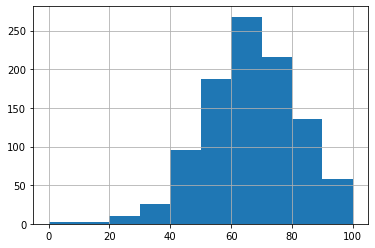

In [14]:
students_performanse.math_score.hist()

In [15]:
students_performanse.math_score.mean()

66.089

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

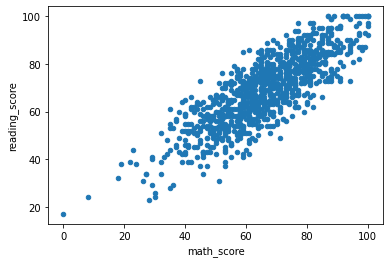

In [16]:
students_performanse.plot.scatter(x='math_score', y='reading_score')

___
Построение более красивых графиков лучше осуществлять с помощью библиотеки seaborn

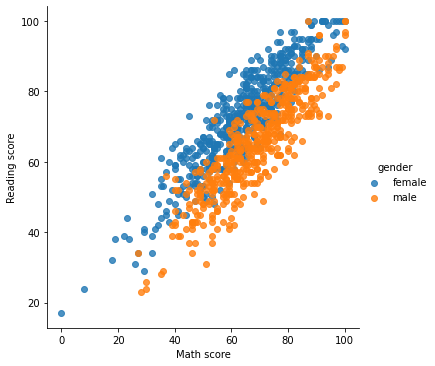

In [25]:
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender' ,data=students_performanse,
          fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

___
Решение задачи 1.7.5

Представьте, что у вас есть датафрэйм df, хранящий данные о зарплате за месяц, со всего 1-ой колонкой income.

Укажите верные способы, как отрисовать простой график зависимости зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)

Убедитесь, что вы используте версию seaborn > = 0.9.

___

In [27]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')

In [30]:
df

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


<AxesSubplot:>

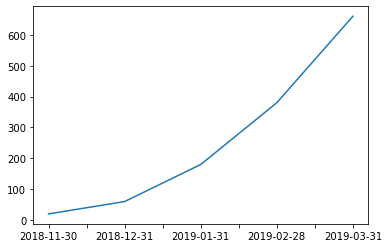

In [32]:
df['income'].plot()

<AxesSubplot:ylabel='income'>

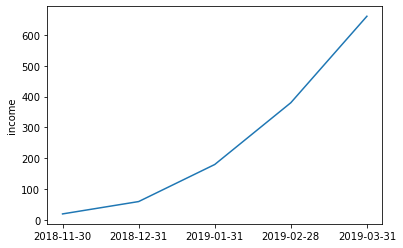

In [33]:
sns.lineplot(x=df.index, y=df.income)

<AxesSubplot:>

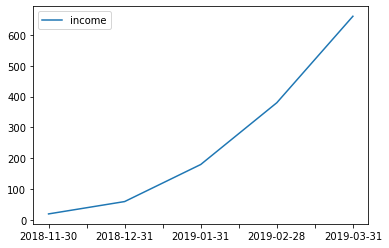

In [34]:
df.plot(kind='line')

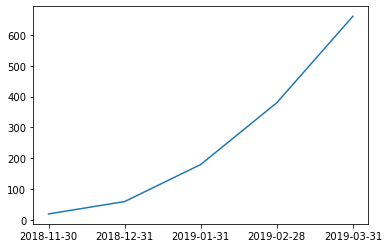

In [35]:
plt.plot(df.index, df.income)

<AxesSubplot:>

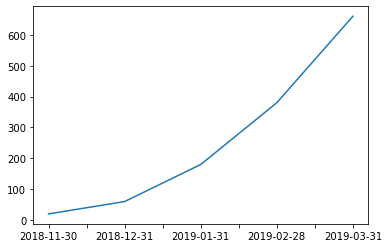

In [36]:
df.income.plot()

<AxesSubplot:>

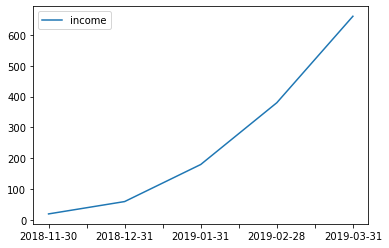

In [37]:
df.plot()

<AxesSubplot:>

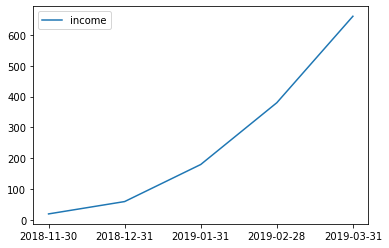

In [38]:
sns.lineplot(data=df)

___
Задача 1.7.6

Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

В ответе вы должны указать число кластеров в виде числа (например: 3).
___

In [47]:
df = pd.read_csv('dataset_209770_6_1.txt', sep=' ')

In [48]:
df.head()

,x,y
0,784.648374,807.144387
1,1196.044303,1083.665468
2,203.469123,603.401777
3,795.094697,789.616430
4,1222.646984,1101.985345


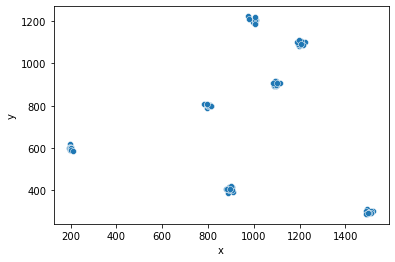

In [50]:
ax = sns.scatterplot(x='x', y='y',data=df)

___
Задача 1.7.7

Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.

Чтобы график отображался как на картинках, добавьте
___

In [53]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)

In [54]:
df.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


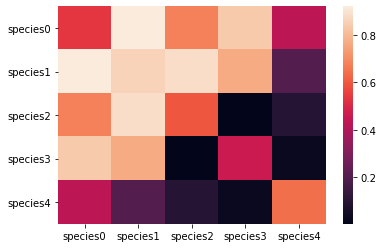

In [58]:
g = sns.heatmap(df)# ваш код для создания теплокарты, укажите параметр cmap="viridis" для той же цветовой схемы
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

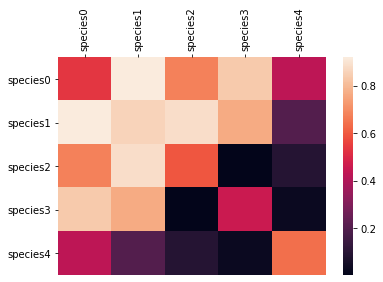

In [63]:
g = sns.heatmap(df)# ваш код для создания теплокарты, укажите параметр cmap="viridis" для той же цветовой схемы
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

___
Пришло время узнать, какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

Это задание можно выполнить многими путями, и рисовать гистограмму вообще говоря для этого не нужно.

Данные взяты отсюда, на этом же сайте можно найти больше разнообразных данных по dota 2
___

In [64]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col=0)

In [65]:
df.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [83]:
df = df.assign(num_of_roles = (df.roles.str.count(',')+1))

In [84]:
df.head()


,attack_type,id,legs,localized_name,name,primary_attr,roles,num_of_roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4


<AxesSubplot:>

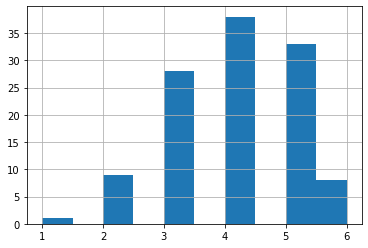

In [85]:
df.num_of_roles.hist()

In [93]:
df.groupby('num_of_roles').count()

,attack_type,id,legs,localized_name,name,primary_attr,roles
num_of_roles,,,,,,,
1,1,1,1,1,1,1,1
2,9,9,9,9,9,9,9
3,28,28,28,28,28,28,28
4,38,38,38,38,38,38,38
5,33,33,33,33,33,33,33
6,8,8,8,8,8,8,8


___
Теперь перейдём к цветочкам. Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

Распределение должно быть по всем образцам, без разделения на вид.
Чтобы построить на 1-ом графике распределения для каждого из параметров, можно воспользоваться петлёй
___

In [123]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)

In [124]:
df = df.drop('species', axis=1)

In [125]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:ylabel='Density'>

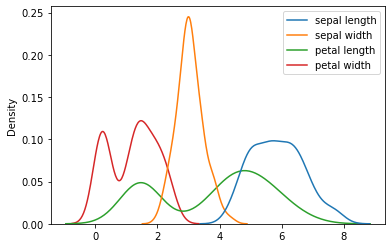

In [126]:
# for column in df:
#     sns.kdeplot(x=column, data=df)
sns.kdeplot(data=df[2:-1])    

___
Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота и выберите правильный (такой же) вариант среди предложенных

___

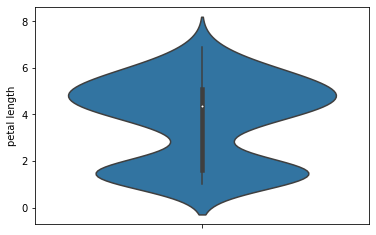

In [131]:
ax = sns.violinplot(y=df["petal length"], data=df)

___
Продолжаем изучение ирисов! Ещё один важный тип графиков - pairplot, отражающий зависимость пар переменных друг от друга, а также распределение каждой из переменных. Постройте его и посмотрите на scatter плоты для каждой из пар фичей. Какая из пар навскидку имеет наибольшую корреляцию?

Также обратите внимание, что можно разделить на группы с помощью параметра hue.

___

In [137]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)

In [140]:
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


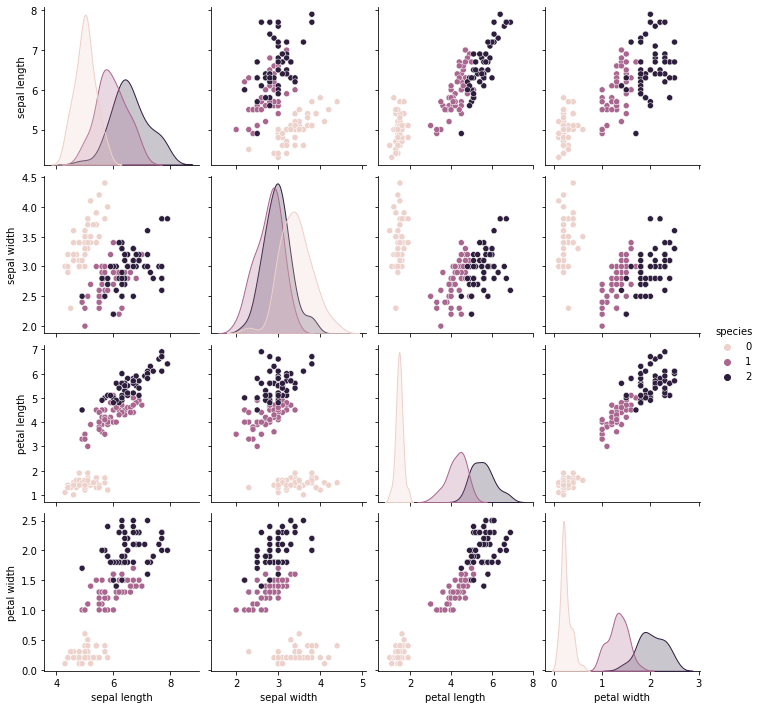

In [139]:
ax = sns.pairplot(data=df, hue='species')

In [134]:
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


___
# Задача 1.8.2

Любым удобным для вас способом создайте dataframe c именем my_data, в котором две колонки c именами (type - строки, value - целые числа) и четыре наблюдения в каждой колонке:

type value
A    10

A    14

B    12

B    23
___

In [2]:
import pandas as pd

my_data = pd.DataFrame(data={'type': ['A', 'A', 'B', 'B'], 'value': [10, 14, 12, 23]})




In [6]:
my_data.value

0    10
1    14
2    12
3    23
Name: value, dtype: int64

___
# Задача 1.8.3

Особенно важный навык при работе с данными - это умение быстро и эффективно отбирать нужные вам колонки или строки.

Начнем с простого, в dataframe с именем my_stat сохранено 20 строк и четыре колонки (V1, V2, V3, V4):

В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.
В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.

Помните, что нумерация индексов строк и колонок начинается с 0.

Обратите внимание, получившиеся subset_1 и subset_2 - тоже должны быть dataframe.

Вы можете скачать набор данных, которые нам также пригодятся в следующих заданиях,  и потренироваться у себя на компьютере. Чтобы считать данные при помощи pandas, используйте функцию read_csv.

import pandas as pd

my_stat = pd.read_csv('my_stat.csv')

Важно понимать, в чем разница между pandas loc и iloc. Как отобрать все строки кроме указанных? Умение искать ответы поможет вам на начальных этапах знакомства с pandas!


___

In [31]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')

In [36]:
my_stat.head(10)

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
5,2,11.0,A,0.0
6,0,9.0,A,2.0
7,1,9.0,A,1.0
8,0,9.0,B,2.0
9,-1,10.0,A,0.0


In [64]:
subset_1 = my_stat.iloc[0:10, [0, 2]]

In [65]:
subset_1

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [66]:
subset_2 = my_stat.drop([0, 4])

In [67]:
subset_2 = subset_2.drop(['V1', 'V3'], axis=1)

In [68]:
subset_2.head(10)

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0
7,9.0,1.0
8,9.0,2.0
9,10.0,0.0
10,10.0,1.0
11,10.0,1.0


Есть также и другой способ убирания определенных строк в датабэйзе

In [78]:
bad_df = my_stat.index.isin([0, 4])

In [79]:
my_stat[~bad_df]

,V1,V2,V3,V4
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
6,0,9.0,A,2.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


Чужое решение:

In [80]:
import pandas as pd    
# переменная my_stat уже создана
subset_1=my_stat.iloc[:10, [0, 2]]
subset_2=my_stat.iloc[:, [1, 3]].drop([0, 4])

In [81]:
subset_1, subset_2 = my_stat.iloc[0:10, [0, 2]], my_stat.iloc[~my_stat.index.isin([0, 4]), [1, 3]]


___
# Задача 1.8.4

Теперь потренируемся отбирать нужные нам наблюдения (строки), соответствующие некому условию. В dataframe с именем my_stat четыре колонки V1, V2, V3, V4:

В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'.

В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1.

Как и в предыдущей задаче результат фильтрации - это тоже dataframe.

Фильтрацию данных можно осуществить разными способами, например так или так.
___

In [82]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')

In [83]:
my_stat

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [86]:
subset_1 = my_stat.query("V1 > 0 and V3 == 'A'")

In [87]:
subset_1

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0
...,...,...,...,...
491,4,7.0,A,2.0
494,1,11.0,A,1.0
495,1,8.0,A,-1.0
496,3,8.0,A,1.0


In [88]:
subset_2 = my_stat.query("V2 != 10 or V4 >= 1")

In [89]:
subset_2

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


___
# Задача 1.8.5

Теперь давайте преобразуем наши данные. В переменной my_stat лежат данные с которыми вам необходимо проделать следующее дейтвие. В этих данных (my_stat) создайте две новые переменных:

V5 = V1 + V4

V6 = натуральный логарифм переменной V2
___

In [94]:
import pandas as pd
import numpy as np

In [95]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')

In [96]:
my_stat = my_stat.assign(V5 = my_stat.V1 + my_stat.V4)

In [97]:
my_stat = my_stat.assign(V6 = np.log(my_stat.V2))

In [98]:
my_stat

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
...,...,...,...,...,...,...
495,1,8.0,A,-1.0,0.0,2.079442
496,3,8.0,A,1.0,4.0,2.079442
497,-1,11.0,B,2.0,1.0,2.397895
498,1,11.0,A,2.0,3.0,2.397895


___
# Задача 1.8.6 

Переменные V1, V2  ... такие имена никуда не годятся. С такими названиями легко запутаться в собственных данных и в результате ошибиться в расчетах.

Переименуйте колонки в данных  my_stat следующим образом:

V1 -> session_value

V2 -> group

V3 -> time

V4 -> n_users
___

In [110]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')

In [113]:
my_stat.rename(columns = {'V1': 'session_value', 
                          'V2': 'group',
                          'V3': 'time', 
                          'V4': 'n_users'}, inplace=True)

In [114]:
my_stat

,session_value,group,time,n_users
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


___
# Задача 1.8.7

В dataframe с именем my_stat сохранены данные с 4 колонками: session_value, group, time, n_users.  

В переменной session_value замените все пропущенные значения на нули.

В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без учета отрицательных значений, разумеется).

Как получить медиану переменной n_users без учета отрицательных значений? Если не придумали решения, подсказка - ищите один из возможных ответов в задачах, которые мы уже решили.

Данные для тренировки.
___

In [127]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')

In [128]:
df

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [130]:
df.session_value.fillna(0, inplace=True)

In [131]:
df

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [141]:
df.query('n_users <= 0').n_users.index

Int64Index([1, 8, 9], dtype='int64')

In [145]:
df['n_users'] = df['n_users'].apply(lambda x: 0 if x < 0 else x)

In [143]:
df

,session_value,time,group,n_users
0,0.0,12,0,9
1,0.0,11,0,0
2,1.0,8,0,1
3,2.0,9,0,3
4,2.0,10,0,9
5,3.0,8,0,8
6,0.0,11,0,5
7,0.0,9,0,4
8,0.0,8,0,0
9,0.0,9,0,0


In [1]:
import pandas as pd
# переменная my_stat уже создана


In [7]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')

In [8]:
my_stat.session_value.fillna(0, inplace=True)

In [9]:
my_stat.n_users = my_stat.n_users.apply(lambda x: x if x >= 0 else my_stat.n_users[my_stat.n_users >= 0].median())

In [10]:
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9.0
1,0.0,11,A,5.0
2,1.0,8,A,1.0
3,2.0,9,B,3.0
4,2.0,10,B,9.0
5,3.0,8,A,8.0
6,0.0,11,B,5.0
7,0.0,9,A,4.0
8,0.0,8,B,5.0
9,0.0,9,A,5.0


___
# Задача 1.8.8

Чуть не забыли, никакой анализ данных не обходится без агрегации наблюдений. Напомню, в pandas с этим нам поможет связка  groupby + некоторое преобразование. Например:

число наблюдений в каждой группе
df.groupby('group_var').count()

Для того, что бы сгруппировать данные по нескольким переменным, используем список с нужными именами:

df.groupby(['group_var_1', 'group_var_2']).count()

Обратите внимание, что при такой записи группирующие переменные станут индексами в итоговом dataframe, изучите справку по groupby, чтобы разобраться со всеми тонкостями группировки данных. Также функция count() применится ко всем колонкам, что не всегда является желанным результатом. Чтобы применить функцию только к нужной колонке в данных, можно использовать связку  groupby() + agg()

my_stat.groupby('group').agg({'n_users': 'count'})

В этой задаче для данных my_stat рассчитайте среднее значение переменной session_value для каждой группы (переменная group), в получившемся dataframe  переменная group не должна превратиться в индекс. Также переименуйте колонку со средним значением session_value в mean_session_value.

Получившийся результат сохраните в dataframe с именем mean_session_value_data.
___

In [2]:
import pandas as pd

In [3]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')

In [29]:
mean_session_value_data = my_stat.groupby('group', as_index=False).agg({'session_value': 'mean'}) \
    .rename(columns = {'session_value': 'mean_session_value'})
print(mean_session_value_data)

  group  mean_session_value
0     A                 1.0
1     B                 1.0


___

Обязательно запомните типы merge и join, это справделиво не только для Pandas, но и для работы с базами данных.
![title](pic_5.jpg)

![title](pic_6.jpg)


___

___

# Решающие деревья

___

In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [3]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


Создадим переменную, в которую созраним дерево решений. Это классификатор

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [12]:
clf

DecisionTreeClassifier(criterion='entropy')

___
Для вызова описания метода необходимо нажать на него курсором и потом нажать shift+tab

___
Разобъем на отдельные данные признаки и значение целевой переменной:

In [21]:
X = data[['X_1', 'X_2']]
# y = pd.DataFrame(data.Y)
y = data.Y

In [22]:
X

,X_1,X_2
0,1,0
1,1,0
2,1,0
3,0,1
4,0,0
5,0,0
6,0,0
7,1,1


In [23]:
y

0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    0
Name: Y, dtype: int64

Обучим дерево решений:

In [25]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

Визуализируем дерево:

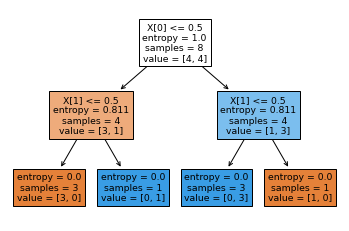

In [29]:
tree.plot_tree(clf.fit(X, y), filled=True);

___

Энтропия -- это уровень неопределенности наших данных.

Entropy is a measure of disorder or uncertainty and the goal of machine learning models and Data Scientists in general is to reduce uncertainty.
![title](Pic_7.png)

Если поровну отрицательных и положительных исходов, а также мы больше ничего не знаем о данных, то энтропия:
![title](Pic_8.png)

Если в данных только умершие (по сути это типа полная определенность):
![title](Pic_9.png)

Таким образом, можно заметить, что энтропия в зависимости от соотношения между положительными и отрицательными признаками имеет вид:
![title](Pic_10.png)
![title](Pic_15.png)

Если мы попробуем разделить наши данные по признаку Х2, то энтропия не изменится (определенность не улучшится)
![title](Pic_11.png)

А вот если попробуем разделять по признаку Х1, то энтропия уменьшится, это хорошо!
![title](Pic_12.png)


Деревья смотрят, разделение по какому признаку дает максимальное приращение информации (Information Gain):

We simply subtract the entropy of Y given X from the entropy of just Y to calculate the reduction of uncertainty about Y given an additional piece of information X about Y. This is called Information Gain. The greater the reduction in this uncertainty, the more information is gained about Y from X.
![title](Pic_13.png)

Далее неопределенность всё равно остается, поэтому будем разделять по признаку Х2:
![title](Pic_14.png)


Два задачи:
![title](Pic_16.png)
![title](Pic_17.png)

In [3]:
import math as m

In [4]:
E_sh_sob=(1/1)*m.log2((1/1)) - 0
E_sh_kot=-(4/9)*m.log2((4/9)) - (5/9)*m.log2((5/9))
E_gav_sob=0 - (5/5)*m.log2((5/5))
E_gav_kot=-(4/5)*m.log2((4/5)) - (1/5)*m.log2((1/5))
E_laz_sob=0 - (6/6)*m.log2((6/6))
E_laz_kot=-(4/4)*m.log2((4/4)) - 0

In [5]:
print(E_sh_sob)
print(E_sh_kot)
print(E_gav_sob)
print(E_gav_kot)
print(E_laz_sob)
print(E_laz_kot)

0.0
0.9910760598382222
0.0
0.7219280948873623
0.0
-0.0


In [6]:
E = -(4/10)*m.log2((4/10)) - (6/10)*m.log2((6/10))
IG_sh = E - (1/10)*E_sh_sob - (9/10)*E_sh_kot
IG_gav = E - (5/10)*E_gav_sob - (5/10)*E_gav_kot
IG_laz = E - (6/10)*E_laz_sob - (6/10)*E_laz_kot

In [7]:
IG_sh

0.07898214060026854

In [8]:
IG_gav

0.6099865470109874

In [9]:
IG_laz

0.9709505944546686

___

# 2.3 Dataset Titanic ML

___

In [11]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
from IPython.display import HTML
from graphviz import Source
from IPython.display import display
from IPython.display import SVG
import os

In [19]:
from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 
HTML(style)

In [21]:
titanic_data = pd.read_csv('titanic_train.csv')

Первое, что следует сделать с данными - это 

In [22]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Второе, что следует сделать с данными - это проверить, какие значения пропущены 

In [23]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
titanic_data.isnull().sum() # посдчет пропущенных значений

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Отбросим скорее всего ненужные данные и Survived, т.к. её мы хотим предсказывать:

In [26]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'],
                     axis=1)

In [27]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Целевую переменную запишем отдельно

In [28]:
y = titanic_data.Survived

In [29]:
clf = tree.DecisionTreeClassifier()

In [30]:
clf.fit(X, y)

ValueError: could not convert string to float: 'male'

Эта ошибка говорит о том, что деревья не умеют работать с строковыми переменными. Значит, нам требуется провести дополнительную преобработку данных

In [31]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [35]:
X = pd.get_dummies(X) # функция для кодирования строковых значений

In [36]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [37]:
clf.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Дерево решений не умеет работать с NaN, значит надо исправить это:

In [38]:
X.Age.median() # Будем заполнять медианным значением

28.0

In [40]:
X = X.fillna({'Age': X.Age.median()})

In [43]:
X.isnull().sum() # посдчет пропущенных значений

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [45]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [46]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

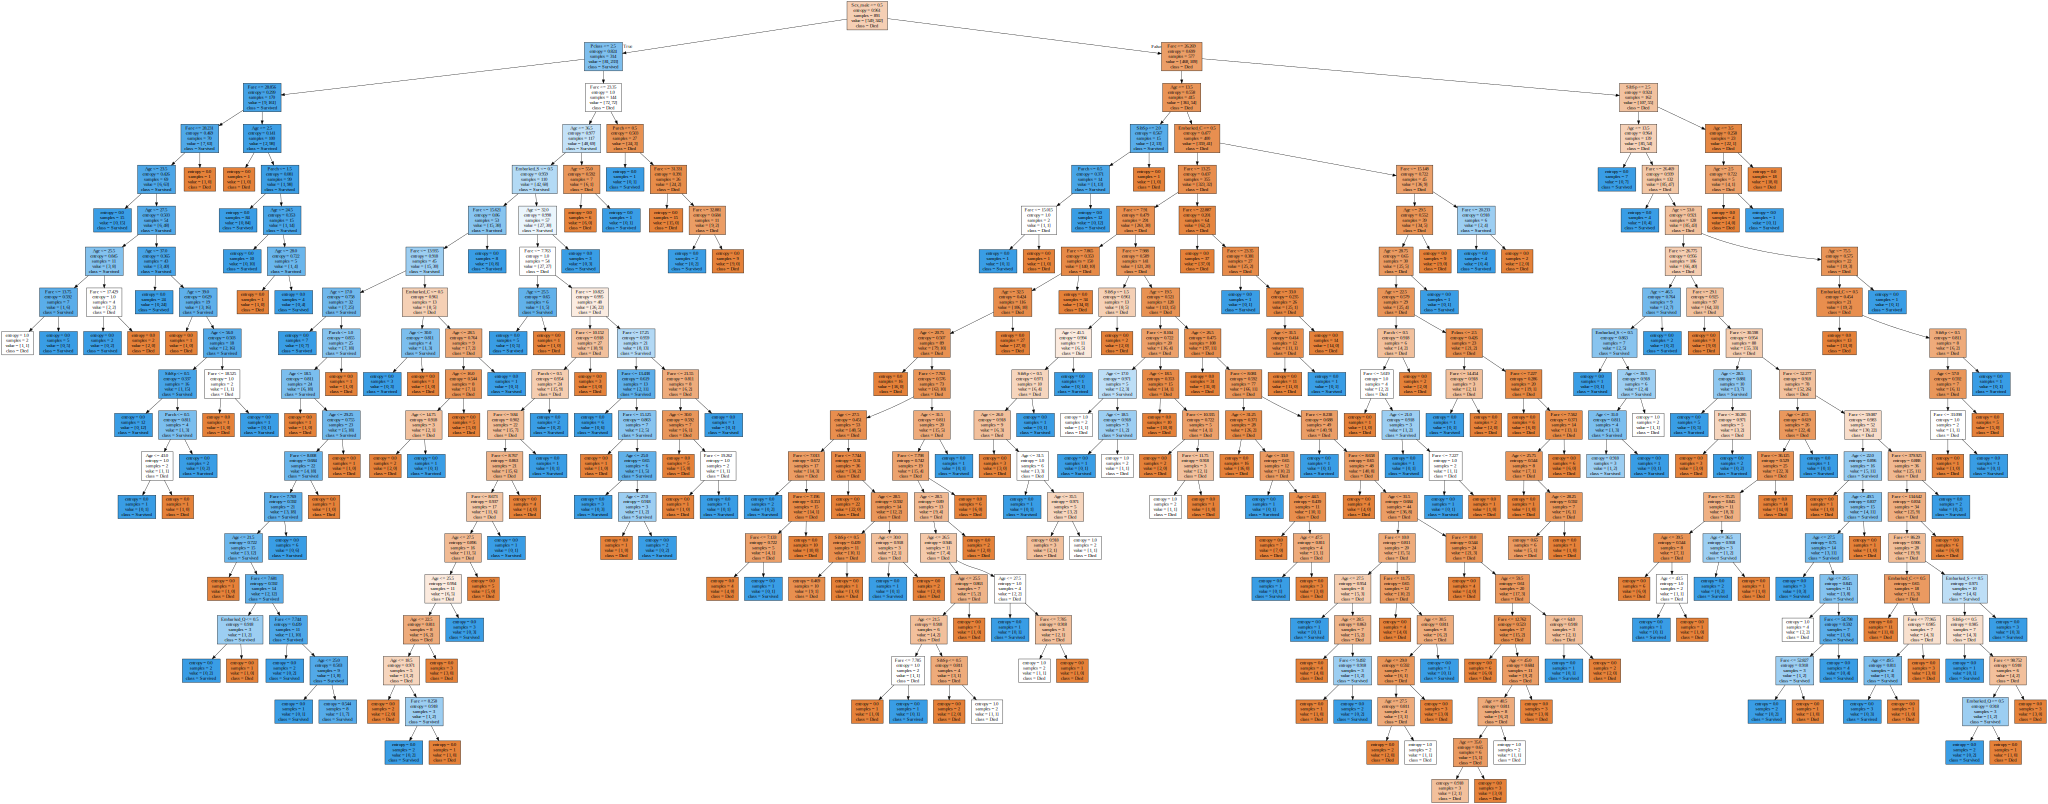

In [64]:
style = "<style>svg{width:0.1% !important;height:0.1% !important;</style>"
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
                class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))